
# Hipótese 4 — Participação Regional Mensal no Crédito do PEAC

**Projeto Aplicado - GRUPO 19**  
**Objetivo:** Analisar a evolução da participação regional no crédito concedido pelo PEAC ao longo do tempo.


In [1]:

# %%
# === IMPORTAÇÃO DE BIBLIOTECAS ===
import pandas as pd
import matplotlib.pyplot as plt
import os

# Estilo dos gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# Caminhos
PASTA_DATA = "../Data"
PASTA_RESULTADOS = "../Resultados"

os.makedirs(PASTA_RESULTADOS, exist_ok=True)


In [2]:

# %%
# === LEITURA DO DATASET ===
arquivo_csv = os.path.join(PASTA_DATA, "PEAC2022.csv")
dados = pd.read_csv(arquivo_csv, sep=";", decimal=",", encoding="latin1")

# Padronizar colunas
dados.columns = dados.columns.str.lower().str.strip()

print(f"Dataset carregado com sucesso!")
print(f"Shape: {dados.shape}")
print(f"Colunas: {list(dados.columns)}")

dados.head()

Dataset carregado com sucesso!
Shape: (453688, 12)
Colunas: ['nome_agente_financeiro', 'cnpj_cpf_cliente', 'nome_cliente', 'porte_cliente', 'valor_credito', 'valor_garantido', 'valor_desembolsado', 'data_solicitacao_outorga', 'municipio_investimento', 'uf_investimento', 'municipio_sede_cliente', 'uf_sede_cliente']


,nome_agente_financeiro,cnpj_cpf_cliente,nome_cliente,porte_cliente,valor_credito,valor_garantido,valor_desembolsado,data_solicitacao_outorga,municipio_investimento,uf_investimento,municipio_sede_cliente,uf_sede_cliente
0,ITAU,**.*43.060/0001-**,FERAMAR DISTRIBUIDORA T P L ME,Média,1.000.000,800.000,1.000.000,2022-09-15,NITEROI,RJ,NITEROI,RJ
1,ITAU,**.*86.809/0001-**,MASTER S.P.R. INS ELETRICAS,Média,200.000,160.000,200.000,2022-09-15,PEDREIRA,SP,PEDREIRA,SP
2,ITAU,**.*62.167/0001-**,I E C RODRIGUES - ME,Média,200.000,160.000,200.000,2022-09-21,CAMAQUA,RS,CAMAQUA,RS
3,ITAU,**.*49.182/0001-**,CLINUTRI LTDA EPP,Média,200.000,160.000,200.000,2022-09-19,RECIFE,PE,RECIFE,PE
4,ITAU,**.*47.450/0001-**,UTILIDADES GOURMET COM EIRELI,Média,1.500.000,1.200.000,1.500.000,2022-09-23,JUNDIAI,SP,JUNDIAI,SP


In [3]:

# %%
# === PADRONIZAÇÃO E CONVERSÕES ===
col_valor = [c for c in dados.columns if "valor" in c][0]
col_uf = [c for c in dados.columns if "uf" in c][0]
col_data = [c for c in dados.columns if "data" in c][0]

dados[col_valor] = (
    dados[col_valor].astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
)
dados[col_valor] = pd.to_numeric(dados[col_valor], errors="coerce")
dados[col_data] = pd.to_datetime(dados[col_data], errors="coerce")


In [4]:

# %%
# === MAPEAMENTO DE REGIÕES ===
mapa_regioes = {
    "AC": "Norte", "AP": "Norte", "AM": "Norte", "PA": "Norte", "RO": "Norte", "RR": "Norte", "TO": "Norte",
    "AL": "Nordeste", "BA": "Nordeste", "CE": "Nordeste", "MA": "Nordeste", "PB": "Nordeste",
    "PE": "Nordeste", "PI": "Nordeste", "RN": "Nordeste", "SE": "Nordeste",
    "DF": "Centro-Oeste", "GO": "Centro-Oeste", "MT": "Centro-Oeste", "MS": "Centro-Oeste",
    "ES": "Sudeste", "MG": "Sudeste", "RJ": "Sudeste", "SP": "Sudeste",
    "PR": "Sul", "RS": "Sul", "SC": "Sul"
}

dados["regiao"] = dados[col_uf].map(mapa_regioes)
dados["ano_mes"] = dados[col_data].dt.to_period("M").astype(str)


## 1) Série Temporal — Participação Regional Mensal

In [5]:

# %%
# === AGRUPAMENTO E PARTICIPAÇÃO ===
agrupado = dados.groupby(["ano_mes", "regiao"], as_index=False)[col_valor].sum()
total_mes = agrupado.groupby("ano_mes")[col_valor].transform("sum")
agrupado["participacao_%"] = (agrupado[col_valor] / total_mes) * 100

# Tabela pivotada para visualização
tabela_participacao = agrupado.pivot(index="ano_mes", columns="regiao", values="participacao_%").fillna(0)


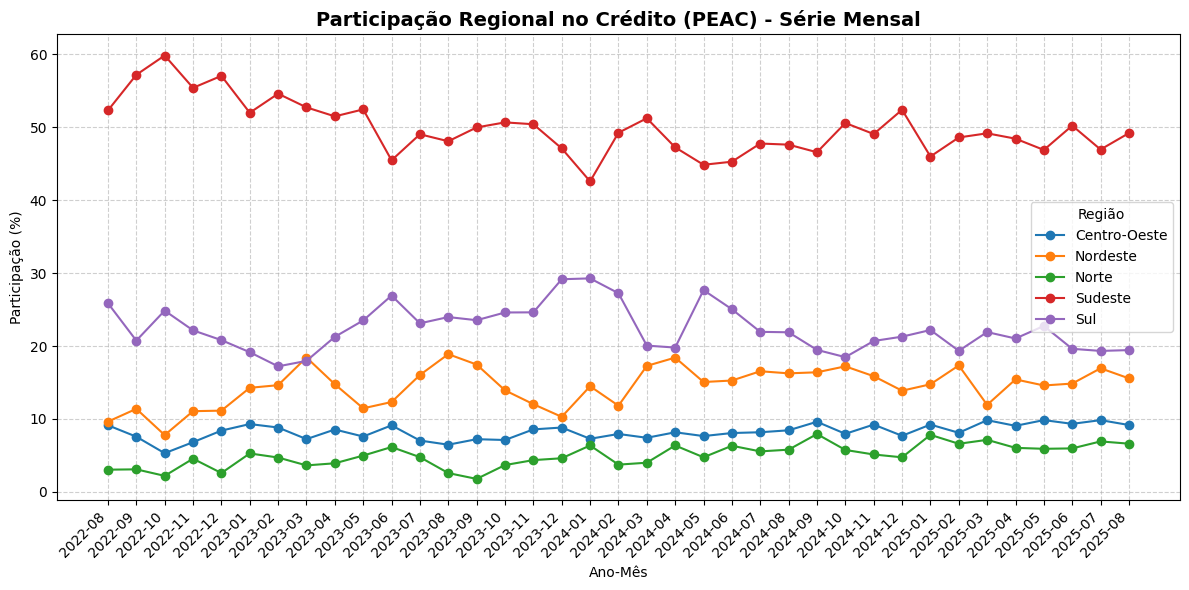

Gráfico salvo em: ../Resultados\serie_regional_mensal_peac.png


In [6]:

# %%
# === GRÁFICO DE LINHAS ===
plt.figure(figsize=(12, 6))
for regiao in tabela_participacao.columns:
    plt.plot(
        tabela_participacao.index,
        tabela_participacao[regiao],
        marker="o",
        label=regiao
    )

plt.title("Participação Regional no Crédito (PEAC) - Série Mensal", fontsize=14, fontweight="bold")
plt.xlabel("Ano-Mês")
plt.ylabel("Participação (%)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Região")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar gráfico
caminho_grafico = os.path.join(PASTA_RESULTADOS, "serie_regional_mensal_peac.png")
plt.savefig(caminho_grafico, dpi=300, bbox_inches="tight")
plt.show()

print(f"Gráfico salvo em: {caminho_grafico}")


## 2) Tabela Visual — Participação Regional Mensal

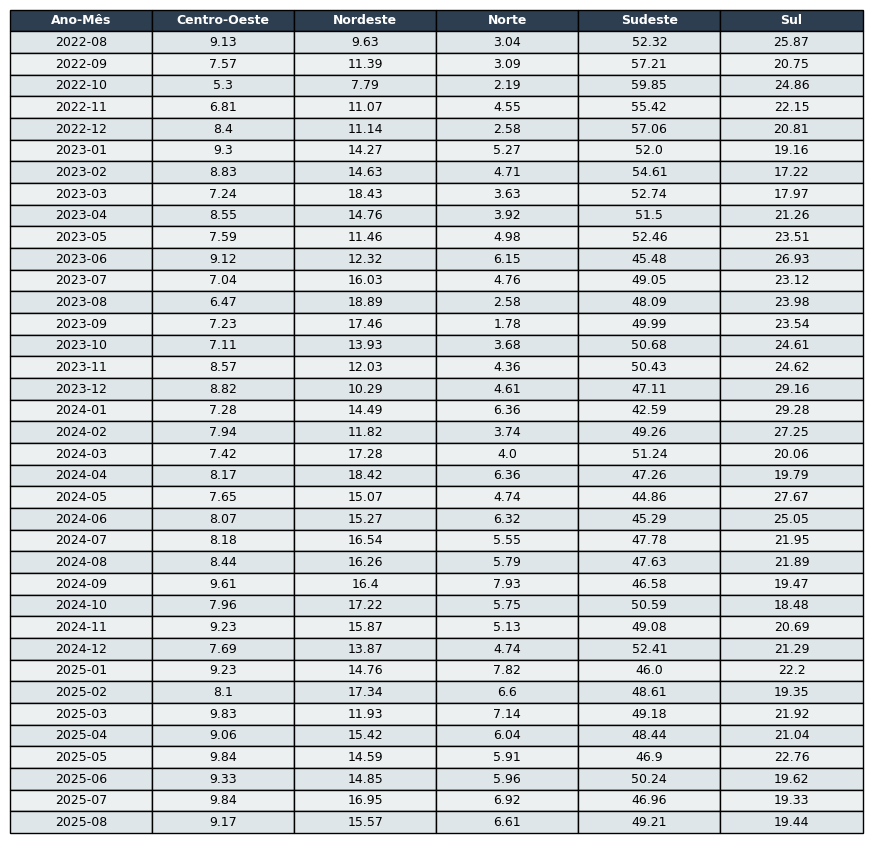

Tabela visual salva em: ../Resultados\tabela_participacao_regional_mensal.png


In [7]:

# %%
tabela_formatada = tabela_participacao.round(2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")
tabela = ax.table(
    cellText=tabela_formatada.reset_index().values,
    colLabels=["Ano-Mês"] + list(tabela_formatada.columns),
    cellLoc='center',
    loc='center'
)

tabela.auto_set_font_size(False)
tabela.set_fontsize(9)
tabela.scale(1.1, 1.3)

# Cores no mesmo padrão das hipóteses anteriores
for (i, j), cell in tabela.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#2c3e50')
    else:
        cell.set_facecolor('#ecf0f1' if i % 2 == 0 else '#dfe6e9')

caminho_tabela = os.path.join(PASTA_RESULTADOS, "tabela_participacao_regional_mensal.png")
plt.savefig(caminho_tabela, bbox_inches="tight", dpi=300)
plt.show()

print(f"Tabela visual salva em: {caminho_tabela}")
